In [1]:
distances = [15]
doubleplanes = [12]
energies = [500]
erels = [50, 100, 200, 400, 1000, 2000]
neutrons = [1, 2, 3, 4]
physicss = ["inclxx"]
algos = ["FixedRValue", "CheatRValue", "FixedAdaBoost", "CheatAdaBoost", "CheatCheat"]

In [2]:
import numpy as np
import pandas as pd
import ROOT
from helpers import filename_for
from plotconfroot import *

Welcome to JupyROOT 6.16/00


In [3]:
def fit_n_plot(ax, xmin, xmax, hist, rebin):
    hist.rebin(rebin)
    fitresult = hist.Fit("gaus", "S", "", xmin, xmax)
    fun = fitresult.FittedFunction().GetFunction()
    xs = np.arange(xmin, xmax, 1)
    ys = [fun.Eval(x) for x in xs]

    rplt.step(hist, axes=ax, color="black")
    ax.plot(xs, ys, color="red")

    ax.text(
        0.98,
        0.7,
        fr"$\sigma$ {round(fitresult.GetParams()[2])}",
        horizontalalignment="right",
        verticalalignment="center",
        transform=ax.transAxes,
        fontsize=15,
    )

    ax.text(
        0.98,
        0.6,
        fr"$E_{{rel}}$ {round(fitresult.GetParams()[1])}",
        horizontalalignment="right",
        verticalalignment="center",
        transform=ax.transAxes,
        fontsize=15,
    )

    volume = fitresult.GetParams()[0] * fitresult.GetParams()[2] * 2.5066 / rebin  # sqrt(2*pi)

    twosigintegral = hist.Integral(
        hist.FindBin(fitresult.GetParams()[1] - 2 * fitresult.GetParams()[2]),
        hist.FindBin(fitresult.GetParams()[1] + 2 * fitresult.GetParams()[2]),
    )

    return fitresult.GetParams()[0], fitresult.GetParams()[1], fitresult.GetParams()[2], volume, twosigintegral

Using matplotlib backend: agg


INFO:ROOT.TCanvas.MakeDefCanvas]  created default TCanvas with name c1


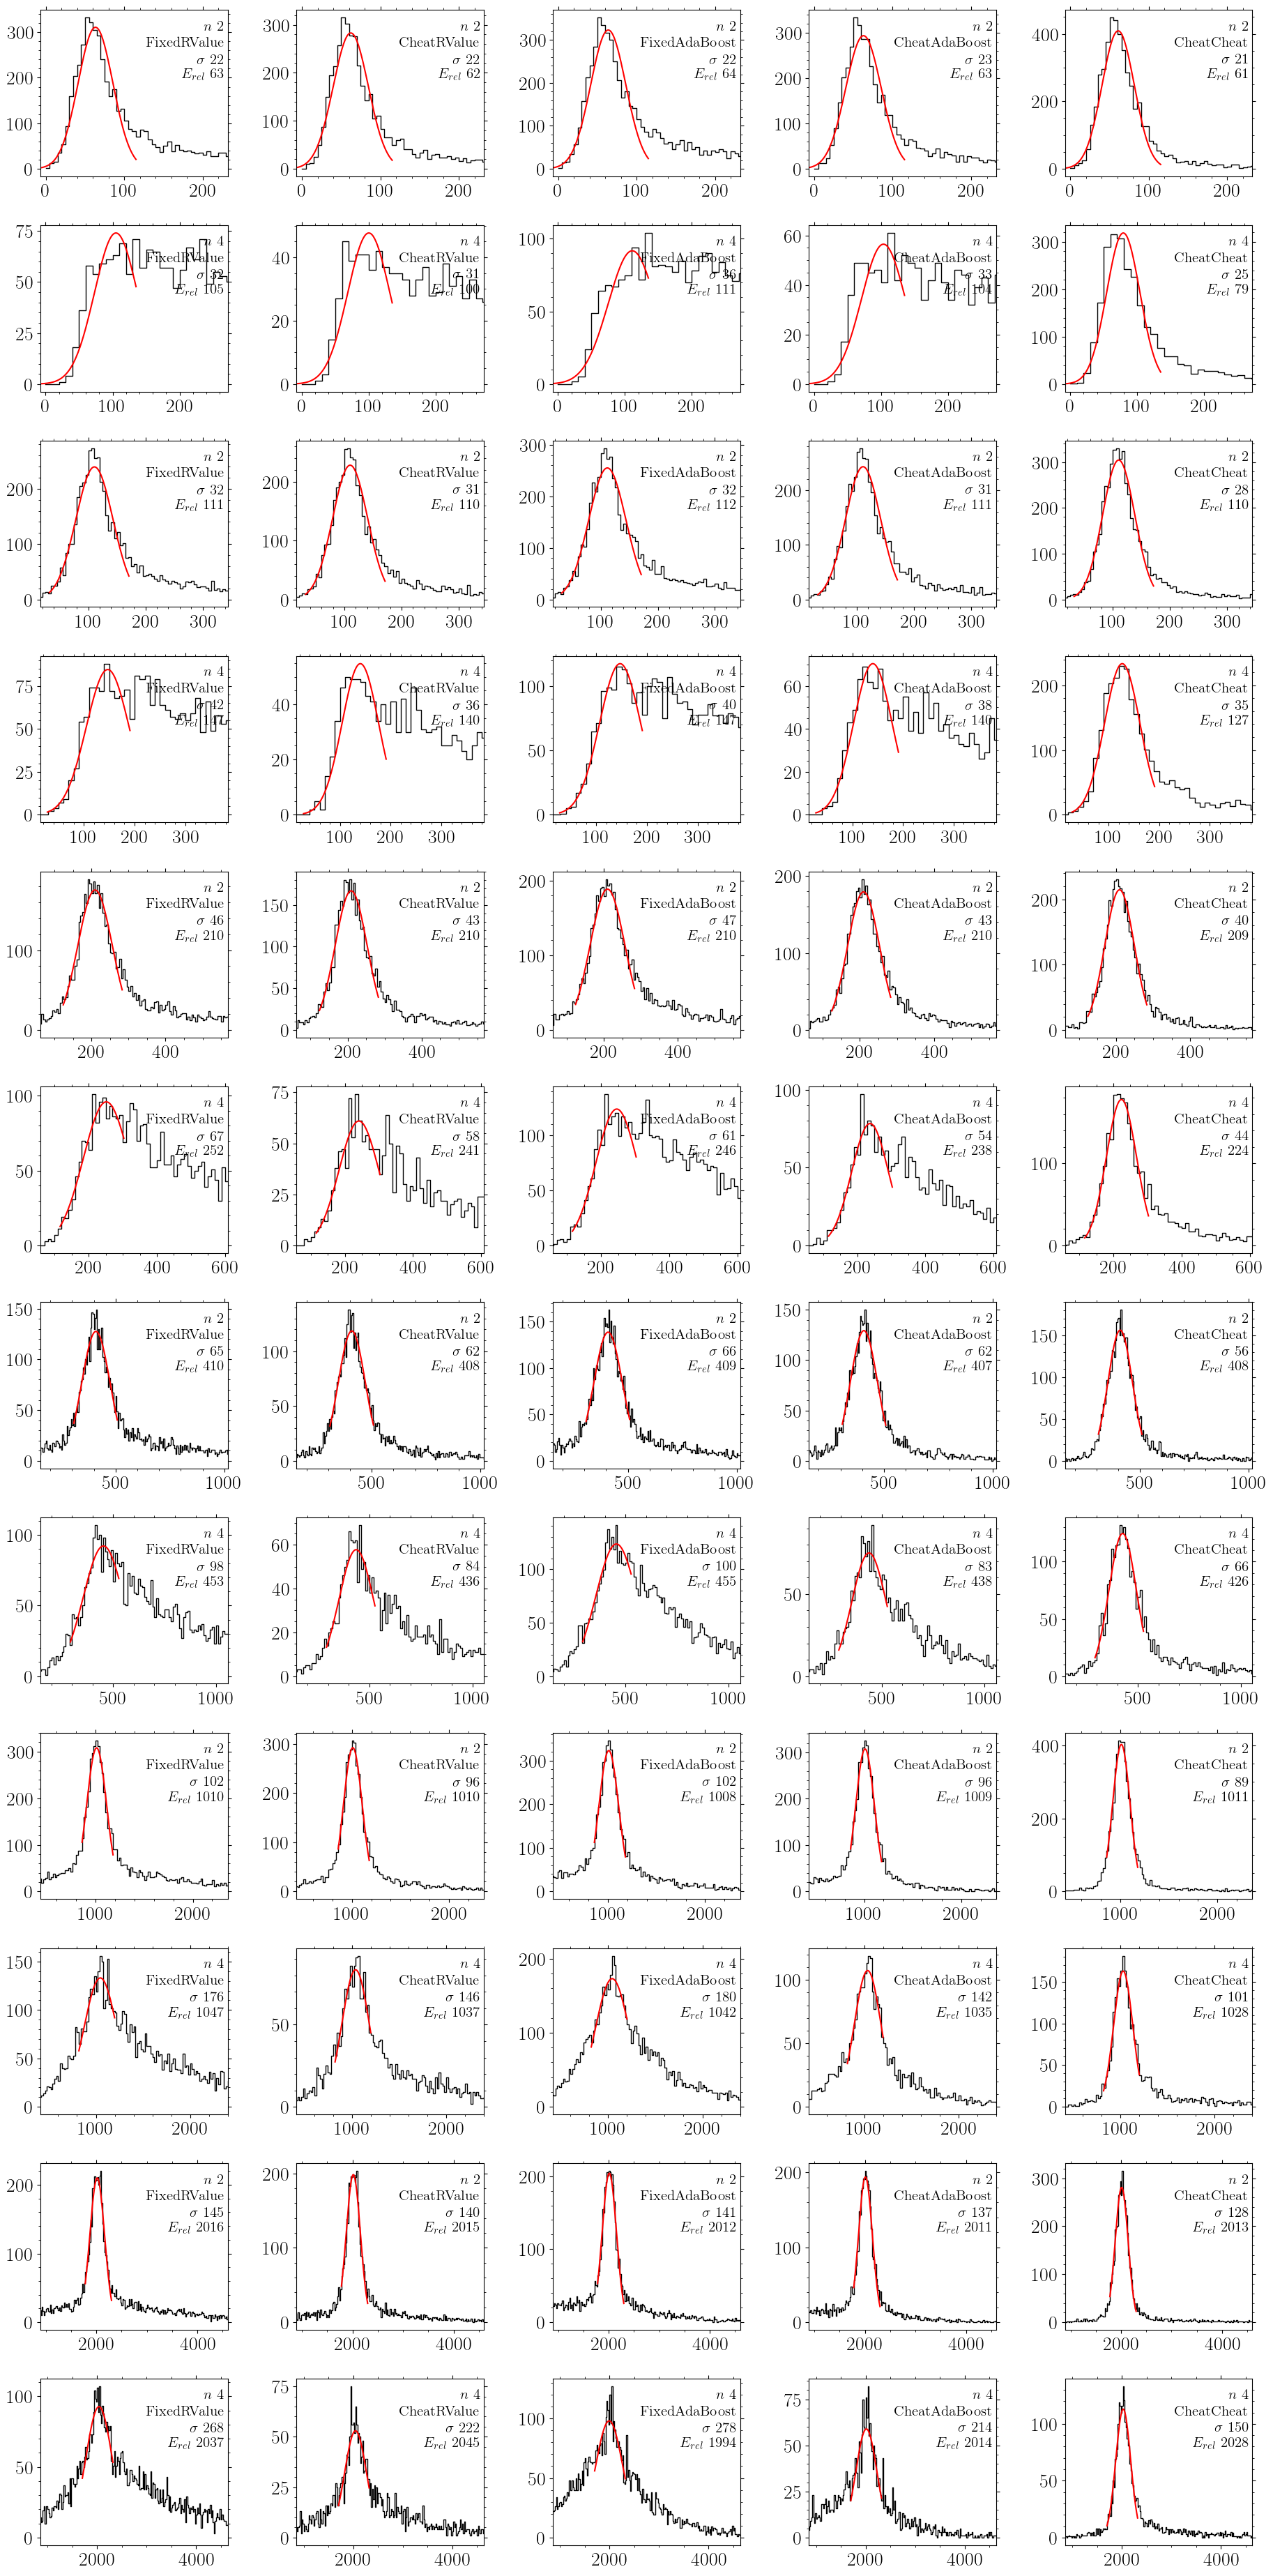

 FCN=215.972 FROM MIGRAD    STATUS=CONVERGED      69 CALLS          70 TOTAL
                     EDM=6.8559e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.10812e+02   6.71394e+00   3.82703e-02   4.92900e-06
   2  Mean         6.33766e+01   5.09175e-01   2.84662e-03   5.76727e-05
   3  Sigma        2.21604e+01   3.24368e-01   2.28988e-05  -2.08468e-03
 FCN=152.753 FROM MIGRAD    STATUS=CONVERGED      59 CALLS          60 TOTAL
                     EDM=2.28925e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.83044e+02   6.71647e+00   3.06233e-02  -3.71044e-05
   2  Mean         6.22632e+01   4.94074e-01   2.55499e-03  -5.70662e-05
   3  Sigma        2.24111e+01   3

In [4]:
%matplotlib

jobs = [
    (distance, doubleplane, energy, erel, neutron, algo)
    for distance in distances
    for doubleplane in doubleplanes
    for energy in energies
    for erel in erels
    for neutron in [2, 4]
    for algo in algos
]

fig = plt.figure(figsize=(6.224 * 3, 6.224 * 6))
tmp = []
for i, job in enumerate(jobs):
    fn = filename_for(job[0], job[1], job[2], job[3], job[4], "inclxx", ".reco.root")
    file = rootpy.io.root_open(fn, "read")
    hist = file.Get(f"NeulandReco{job[5]}/fhErel{job[4]}")

    if job[4] == 2:
        rebin = 5
        xmin = 0.92 * job[3] - 60
        xmax = 1.12 * job[3] + 60
    if job[4] == 4:
        rebin = 10
        xmin = 0.88 * job[3] - 60
        xmax = 1.12 * job[3] + 80
    if job[3] > 900:
        rebin = 20

    ax = fig.add_subplot(len(jobs) / 5, 5, i + 1)
    result = fit_n_plot(ax, xmin, xmax, hist, rebin)
    
    ax.set_xlim(0.5 * xmin, 2 * xmax)
    ax.text(
        0.98,
        0.9,
        fr"$n$ {job[4]}",
        horizontalalignment="right",
        verticalalignment="center",
        transform=ax.transAxes,
        fontsize=15,
    )
    ax.text(
        0.98,
        0.8,
        fr"{job[5]}",
        horizontalalignment="right",
        verticalalignment="center",
        transform=ax.transAxes,
        fontsize=15,
    )

    tmp.append([*job, *result])

fig.tight_layout()

data = pd.DataFrame(tmp)
data.columns = [
    "distance",
    "doubleplane",
    "energy",
    "erel",
    "neutron",
    "algo",
    "constant",
    "mean",
    "sigma",
    "volume",
    "integral",
]

display(fig)

In [5]:
display(data)

,distance,doubleplane,energy,erel,neutron,algo,constant,mean,sigma,volume,integral
0,15,12,500,50,2,FixedRValue,310.812209,63.376642,22.160419,3452.956255,3516.0
1,15,12,500,50,2,CheatRValue,283.044337,62.263165,22.411092,3180.039539,3199.0
2,15,12,500,50,2,FixedAdaBoost,323.149772,63.940894,22.356033,3621.709689,3690.0
3,15,12,500,50,2,CheatAdaBoost,294.144559,62.759416,22.589615,3331.077046,3355.0
4,15,12,500,50,2,CheatCheat,408.880880,60.846413,20.573202,4217.098377,4232.0
5,15,12,500,50,4,FixedRValue,74.028245,104.989639,32.033308,594.407496,731.0
6,15,12,500,50,4,CheatRValue,47.694944,100.075376,31.349212,374.786560,456.0
7,15,12,500,50,4,FixedAdaBoost,91.753179,110.869940,35.686270,820.743229,1100.0
8,15,12,500,50,4,CheatAdaBoost,56.477119,103.543432,32.963521,466.649885,572.0
9,15,12,500,50,4,CheatCheat,318.803342,79.155512,24.828064,1984.041532,2058.0


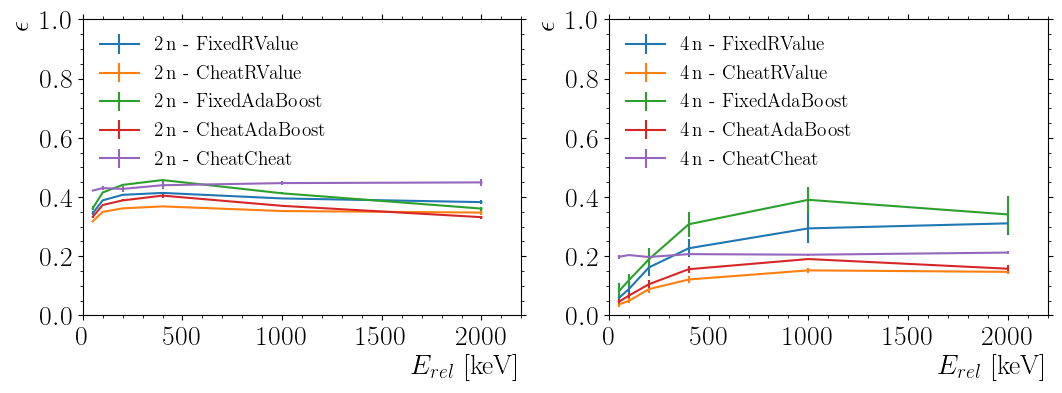

In [6]:
fig = plt.figure(figsize=(6.224 * 2, 6.224 / 1.618))

for i, neutron in enumerate([2, 4]):
    ax = fig.add_subplot(1, 2, i + 1)
    ax.set_xlim(0, 2200)
    ax.set_xlabel(r"$E_{rel}$ [keV]", horizontalalignment="right", x=1)
    ax.set_ylim(0, 1)
    ax.set_ylabel(r"$\epsilon$", horizontalalignment="right", y=1)

    for algo in algos:
        tmp = data.loc[(data["neutron"] == neutron) & (data["algo"] == algo)]
        ax.errorbar(
            tmp["erel"].values, tmp["volume"].values / 10000, yerr=(tmp["volume"].values - tmp["integral"].values) / 10000, label=f"{neutron}\,n - {algo}",
        )
    ax.legend(loc="upper left", prop={"size": "x-small"})

# fig.savefig("results/sigma.pdf", bbox_inches="tight")
display(fig)